# **Datenanalyse des botanischen Gartens**
## Gruppenprojekt: Anna Lexer & Chiara Maderbök

### Setup & Daten

In [24]:
from pandas import read_csv
data = read_csv(
    "data/iris.csv",
    sep=",",
    decimal=".",
)

from seaborn import heatmap, pairplot
from seaborn import scatterplot 

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report 

from scipy.cluster import hierarchy
from matplotlib import pyplot as plt

### **1. Explorative Datenanalyse**

#### 1.1. Statische Gesamtauswertung aller numerischen Features

In [25]:
data.describe()

,instant,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.057333,3.758000,1.199333,1.000000
std,43.445368,0.828066,0.435866,1.765298,0.762238,0.819232
min,0.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,37.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,74.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,111.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,149.000000,7.900000,4.400000,6.900000,2.500000,2.000000


#### 1.2. Verteilung von sepal_length_cm & nummerische Kennzahlen

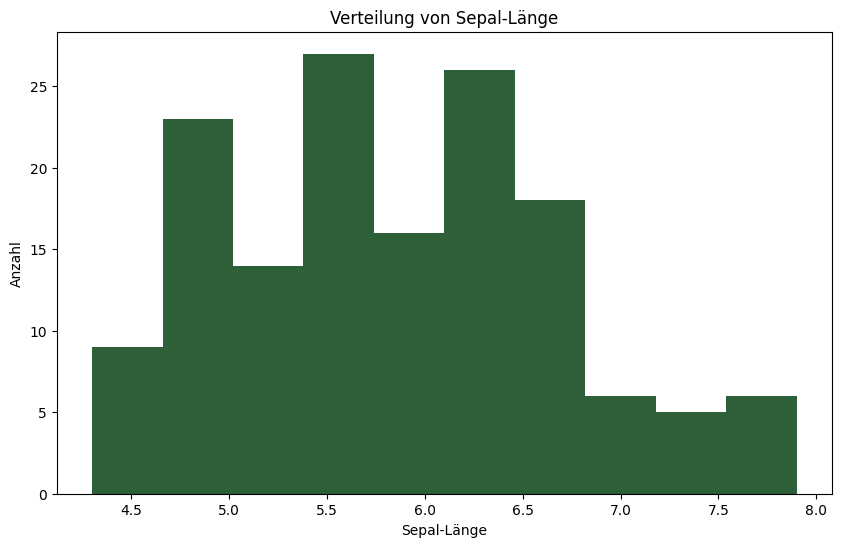

In [26]:
plt.figure(figsize=(10,6))
data["sepal_length_cm"].plot(
    kind="hist",
    title="Verteilung von Sepal-Länge",
    xlabel="Sepal-Länge",
    ylabel="Anzahl",
    color="#2d5f39"
    )
plt.show()

In [27]:
mean_value = data["sepal_length_cm"].mean()
std_value = data["sepal_length_cm"].std()

print(f"Mittelwert der Sepal-Länge: {mean_value:.4f} cm")
print(f"Standardabweichung der Sepal-Länge: {std_value:.4f} cm")

Mittelwert der Sepal-Länge: 5.8433 cm
Standardabweichung der Sepal-Länge: 0.8281 cm


#### 1.3. Beziehung sepal_length_cm und petal_length_cm

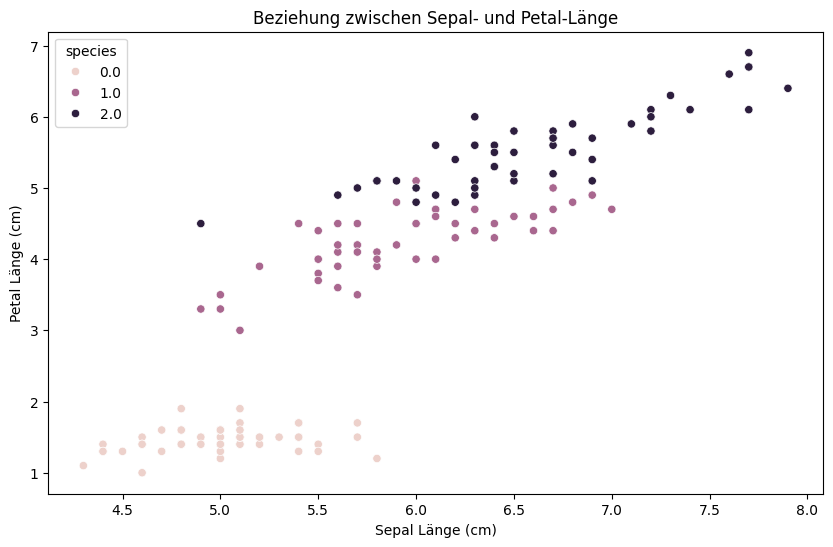

In [28]:
plt.figure(figsize=(10,6))
scatterplot(data=data, x="sepal_length_cm", y="petal_length_cm", hue="species")
plt.title("Beziehung zwischen Sepal- und Petal-Länge")
plt.xlabel("Sepal Länge (cm)")
plt.ylabel("Petal Länge (cm)")
plt.show()


In [29]:
# Zusatz: Korrelation
selected_cols = ["sepal_length_cm", "petal_length_cm"]
data[selected_cols].corr()

,sepal_length_cm,petal_length_cm
sepal_length_cm,1.000000,0.871754
petal_length_cm,0.871754,1.000000


#### 1.4. Korrelationsanalyse

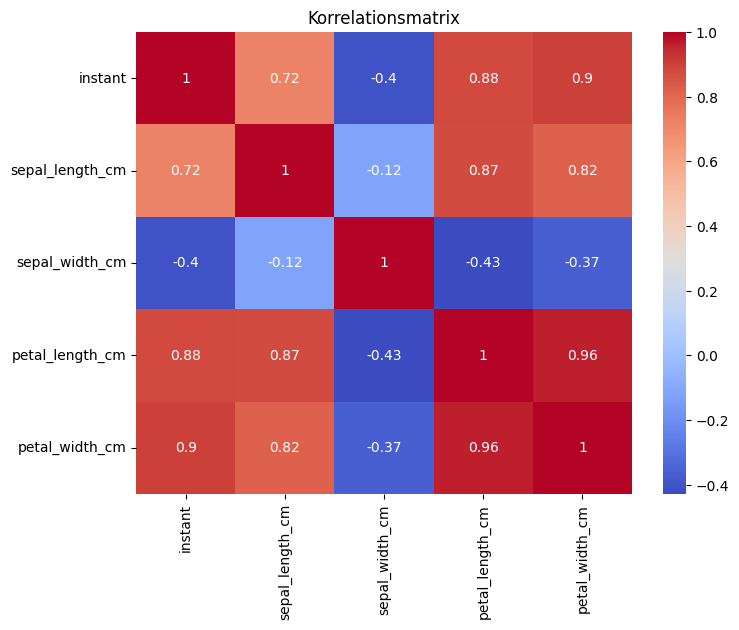

In [30]:
plt.figure(figsize=(8,6))
heatmap(data.drop(columns='species').corr(), annot=True, cmap='coolwarm')
plt.title("Korrelationsmatrix")
plt.show()

#### 1.5. Pairplot 

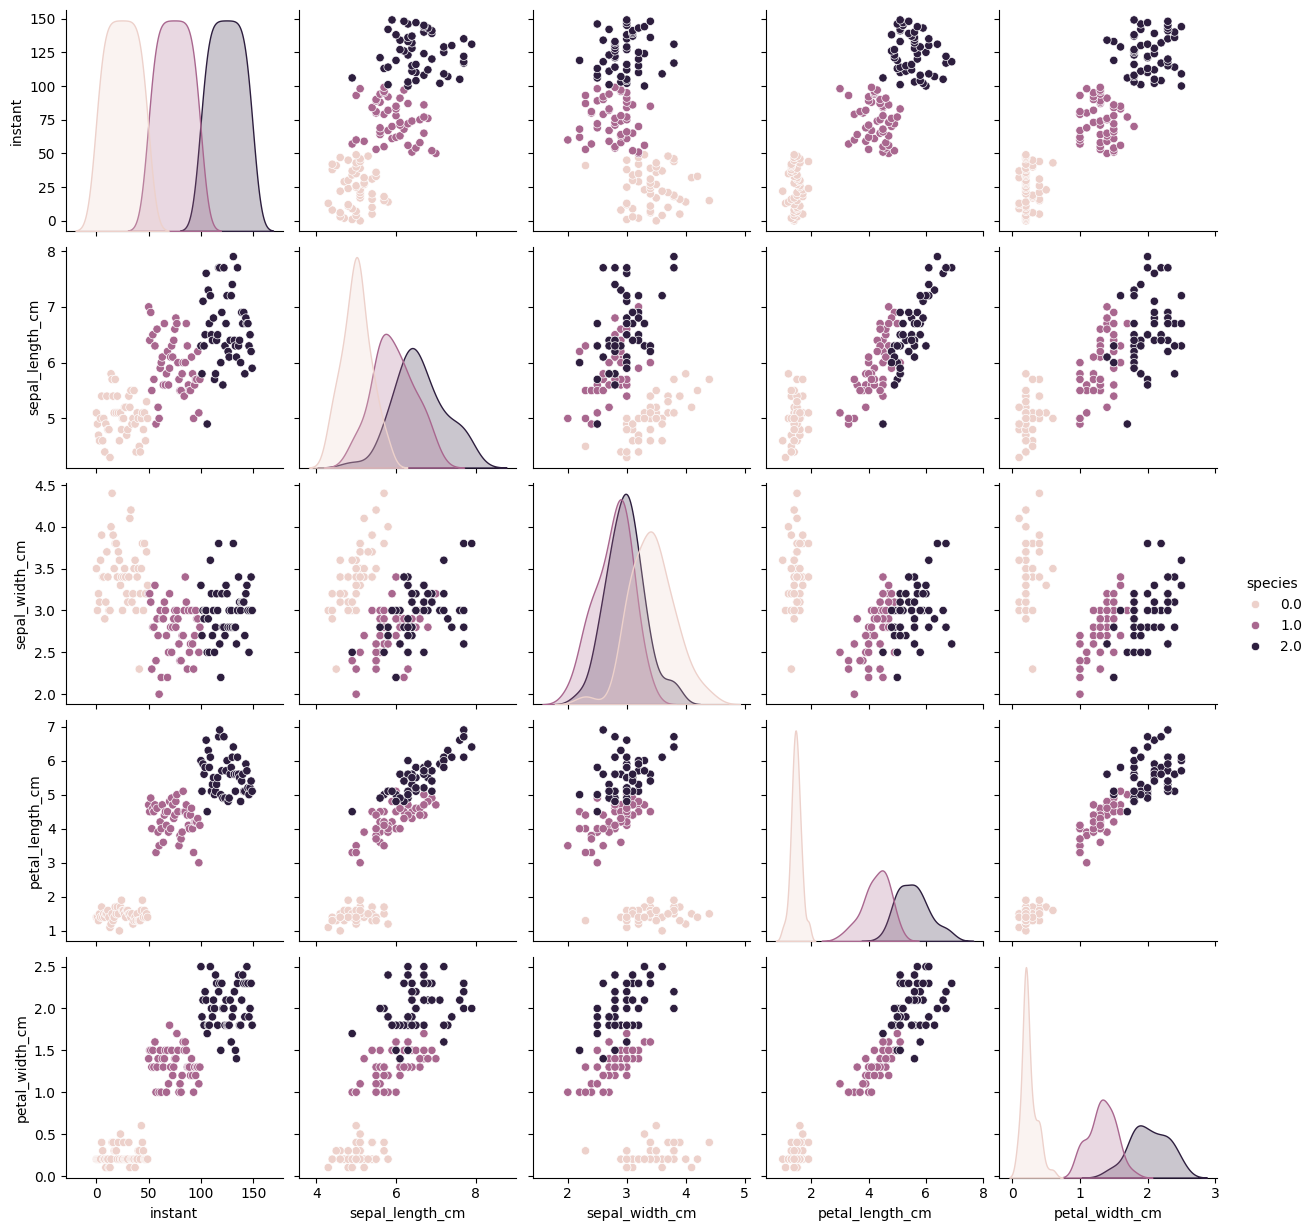

In [31]:
pairplot(data, hue="species")

#### 1.5. Interpretation der Darstellungen und Auswertungen

**Die explorative Analyse des Iris-Datensatzes liefert eine Vielzahl interessanter Einblicke in die Struktur der Daten.** 

Besonders auffällig ist, dass die Merkmale "petal_length_cm" und "petal_width_cm" eine starke Streuung zwischen den Arten zeigen. So zeigt sich beispielsweise in den Histogrammen und im Pairplot, dass die Art 0 (Iris-setosa) klar von den anderen beiden Arten separierbar ist: Ihre Petal-Länge ist deutlich kürzer und liegt in einem Bereich, der sich nicht mit den Werten der anderen beiden Arten (versicolor und virginica) überschneidet. Das bedeutet, dass bereits einfache Schwellenwerte für eine nahezu perfekte Trennung dieser Klasse ausreichen.

Auch die Korrelationen liefern wichtige Erkenntnisse: Zwischen "petal_length_cm" und "petal_width_cm" besteht eine sehr hohe positive Korrelation, was bedeutet, dass bei einer Pflanze mit langer Petal-Blüte auch die Breite tendenziell größer ist. Sepal-Länge und Sepal-Breite hingegen weisen eine deutlich schwächere (teilweise negative) Beziehung auf, was bedeutet, dass sie nicht in gleichem Maße gemeinsam variieren. Diese Erkenntnisse deuten darauf hin, dass Petal-Merkmale stärker zur Trennung der Klassen beitragen als die Sepal-Merkmale.

Zusätzlich wurde auch die Verteilung des Features "sepal_length_cm" untersucht. Die Werte verteilen sich in einer leicht rechtsschiefen Normalverteilung mit einem Mittelwert um ca. 5.8 cm. Dies deutet darauf hin, dass die meisten Pflanzen ähnliche Sepal-Längen aufweisen, mit einigen wenigen Ausreißern in Richtung höherer Werte.

### **2. Unsupervised Learning**

#### 2.1. Dendrogram

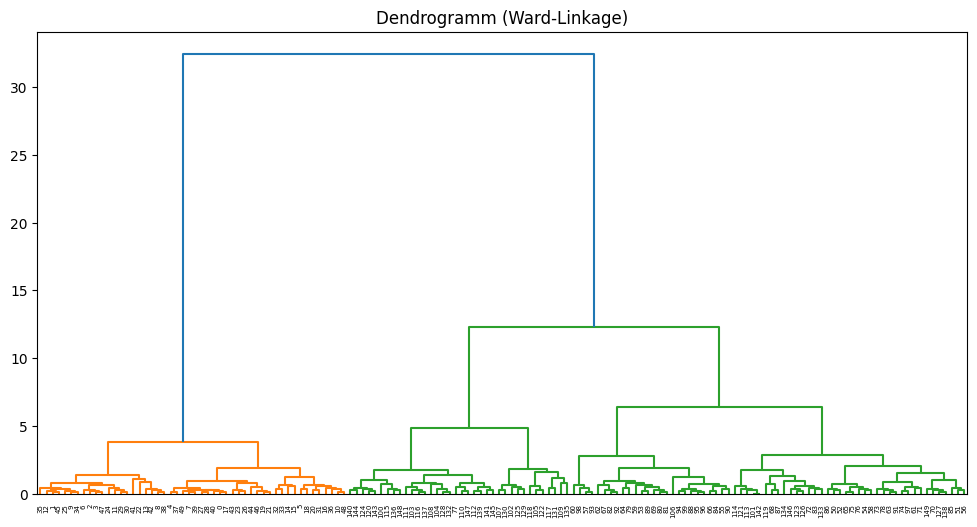

In [32]:
target = [
    "species"
]

features = [
    "sepal_length_cm",
    "sepal_width_cm",
    "petal_length_cm",
    "petal_width_cm"
]
X = data[features]
y = data[target]

Z = hierarchy.linkage(X, method="ward")
plt.figure(figsize=(12,6))
hierarchy.dendrogram(Z)
plt.title("Dendrogramm (Ward-Linkage)")
plt.show()

#### 2.2. Clusteranalyse

##### 2.2.1. Clustering mit KMeans

In [33]:
kmeans_engine = KMeans(n_clusters=3, random_state=42)
kmeans_engine.fit(X)
kmeans_engine.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [34]:
data["kmeans_cluster"] = kmeans_engine.fit_predict(X)

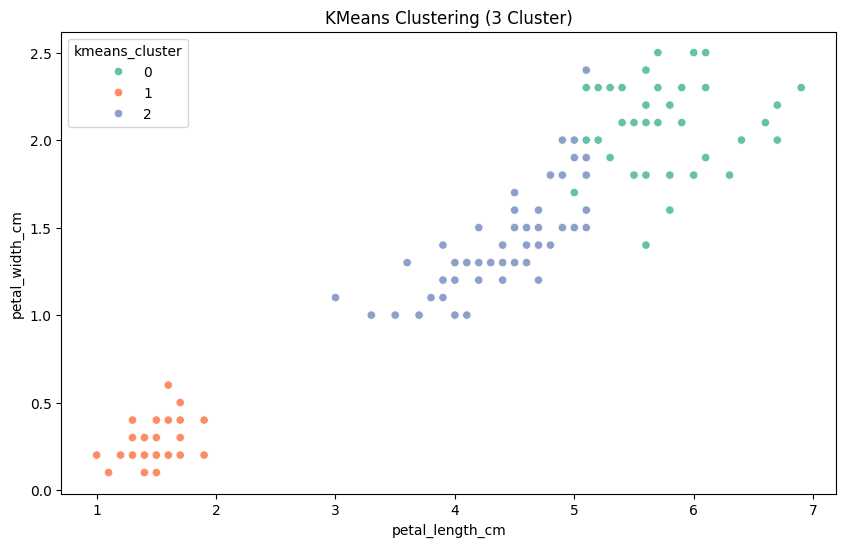

In [35]:
plt.figure(figsize=(10,6))
scatterplot(x="petal_length_cm", y="petal_width_cm", data=data, hue="kmeans_cluster", palette="Set2")
plt.title("KMeans Clustering (3 Cluster)")
plt.show()

##### 2.2.2. Agglomerative Clustering

In [36]:
hierarchical_engine = AgglomerativeClustering(n_clusters=3)
hierarchical_engine.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

#### 2.3. Interpretation der Clusteringergebnisse

Beim **Unsupervised Learning** wurde zunächst ein Dendrogramm erstellt, das die Struktur der Ähnlichkeiten zwischen den Datenpunkten visualisiert. Schon anhand der Höhe, bei der sich große Verzweigungen (Splits) bilden, lässt sich abschätzen, dass drei Cluster eine sinnvolle Wahl sind – was mit der biologischen Realität von drei Iris-Arten übereinstimmt. Das Dendrogramm bestätigt also, dass in den Daten eine natürliche Gruppierung vorhanden ist.

Die beiden durchgeführten Clustering-Verfahren – KMeans und Agglomerative Clustering – liefern sehr ähnliche Ergebnisse. Besonders die KMeans-Visualisierung zeigt deutlich abgegrenzte Gruppen. Die Zuordnung der Cluster stimmt in weiten Teilen mit den tatsächlichen Iris-Gattungen überein, insbesondere die Art 0 (setosa) bildet eine klar erkennbare, eigene Gruppe. Die Arten 1 & 2 (Versicolor und Virginica) liegen dichter beieinander, wodurch es zu kleinen Überschneidungen in der Cluster-Zuordnung kommt.

Die Interpretation der Clusterergebnisse zeigt also, dass der Datensatz auch ohne Label-Informationen eine gut erkennbare natürliche Dreiteilung aufweist, was darauf schließen lässt, dass die Klassenunterschiede stark in den Daten verankert sind.

### **3. Supervised Learning**

#### 3.1. Vorbereitung der Daten

In [37]:
features = [
    "sepal_length_cm", 
    "sepal_width_cm", 
    "petal_length_cm", 
    "petal_width_cm"
]

target = [
    "species"
    ]

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#### 3.2. Modelle trainieren

##### 3.2.1. Decision Tree

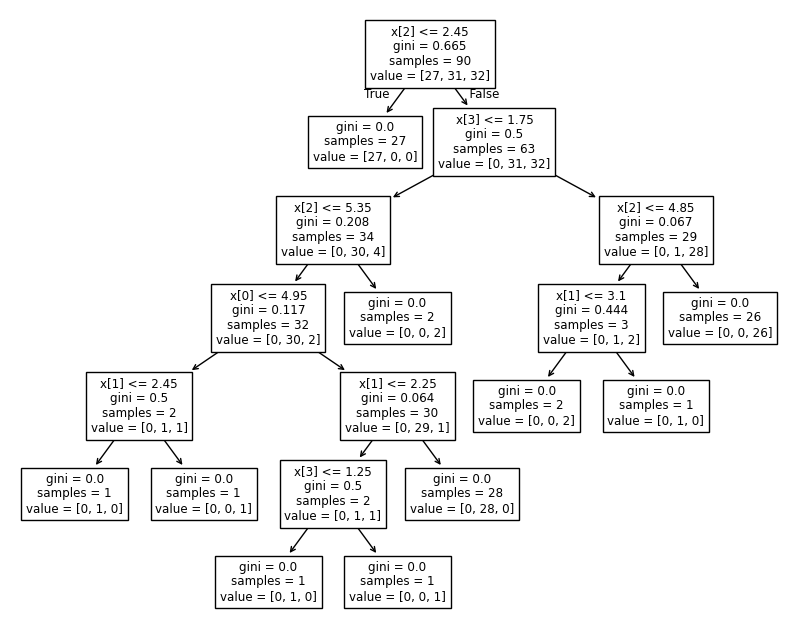

In [38]:
tree_model = DecisionTreeClassifier(random_state=42) 
tree_model.fit(X_train, y_train)
y_pred_dt = tree_model.predict(X_test)
plt.figure(figsize=(10,8))
plot_tree(tree_model)
plt.show()

##### 3.2.2. K Nearest Neighbor (KNN)

In [39]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#### 3.3. Evaluierung der Modelle

##### 3.3.1. Decision Tree

In [40]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
recall_dt = recall_score(y_test, y_pred_dt, average='macro')

print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.97
Precision: 0.96
Recall: 0.96

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       0.95      0.95      0.95        19
         2.0       0.94      0.94      0.94        18

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



##### 3.3.2. K Nearest Neighbor

In [41]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')

print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
## unrealisitsch!!

Accuracy: 0.98
Precision: 0.98
Recall: 0.98

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       0.95      1.00      0.97        19
         2.0       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



#### 3.4. Interpretation der Ergebnisse

Die beiden gewählten Klassifikationsmodelle (**Supervised Learning**) – Decision Tree und K-Nearest Neighbors (KNN) – lieferten auf dem gegebenen Trainings-/Testsplit eine sehr hohe Genauigkeit von nahe oder exakt 100 % - KNN schneidet bei den Metriken Accuracy, Precision und Recall im Vergleich zum Decision Tree leicht besser ab. Dieses Ergebnis erscheint auf den ersten Blick unrealistisch gut, ist aber angesichts des gut trennbaren Iris-Datensatzes durchaus erklärbar. Wie bereits in der Explorativen Datenanalyse festgestellt, sind die Klassen insbesondere anhand der Petal-Merkmale stark voneinander unterscheidbar. Modelle wie Decision Trees und KNN können solche klaren Trennungen sehr gut lernen, vor allem bei einem Datensatz mit 150 Datenpunkten.

Bei genauerer Analyse zeigt sich: Iris-setosa (Art 0) wird von beiden Modellen durchgehend korrekt erkannt – was auch der biologischen Trennbarkeit entspricht. Die geringen Verwechslungen treten eher zwischen versicolor und virginica (Arten 1 & 2) auf, was der realen Ähnlichkeit dieser beiden Gattungen entspricht.

Trotz der hohen Scores in Accuracy, Precision und Recall ist es wichtig zu betonen, dass solche perfekten Werte in realen Datensätzen untypisch sind. Für eine robustere Bewertung wäre es empfehlenswert, zusätzlich eine Cross-Validation durchzuführen. Dennoch demonstriert dieses Ergebnis sehr anschaulich, wie gut Machine-Learning-Modelle arbeiten können, wenn die Datenstruktur deutlich zwischen den Klassen unterscheidet und kaum Störfaktoren vorhanden sind.